<h3><u><center> Defining Problem Statement and Analysing basic metrics </center></u></h3>
<ul>
    <li> Yulu offers ride-sharing electric cycle services in India </li>
    <li> Yulu has recently suffered considerable dips in its revenues. They want to understand the factors affecting the demand for these shared electric cycles in the Indian market </li>
<li> Find out which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands </li> 
</ul>

<b> Dataset Definition: </b>

<ul>
    <li> Season: Season (1: spring, 2: summer, 3: fall, 4: winter) </li>
    <li> Holiday : Yes(1), No (0) </li>
    <li> Working Day: If day is neither weekend nor holiday => 1, else 0 </li>
    <li> weather: </li> <ol> 
        <li> Clear, Few clouds, partly cloudy, partly cloudy </li>
        <li> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist </li>
        <li> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds </li>
        <li> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog </li>
    </ol>
    <li> Humidity: 0-100
    <li> atemp: feeling temperature in Celsius </li>
    <li> count = casual users + registered users </li>
</ul>
    
<b><u> Importing libraries </u></b>

In [195]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings # to supress any warnings coming out
warnings.filterwarnings("ignore")

In [341]:
from scipy.stats import f_oneway #One-way anova
from scipy.stats import ttest_ind #T-Test independent
from scipy.stats import chi2_contingency #Chi2 test

# Tests for Normality
from scipy.stats import shapiro #Shapiro Wilk Test 
from scipy.stats import normaltest # D’Agostino and Pearson’s K2 Test
from scipy.stats import probplot #PP plot for normality
import statsmodels.api as sm #for QQ plot
import pylab #for QQ plot

from scipy.stats import levene #to check whether variances are similar
from scipy.stats import boxcox
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

In [196]:
yulu = pd.read_csv("yulu_bike_sharing.csv")
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [197]:
yulu.shape

(10886, 12)

In [198]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### <u>Data type correction, Data description</u>

In [199]:
# for col in yulu.columns[yulu.dtypes == "object"].tolist():

yulu.datetime = pd.to_datetime(yulu.datetime) 
yulu.season = yulu.season.astype("category")
yulu.weather = yulu.weather.astype("category")

In [200]:
yulu.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [201]:
yulu.describe(include = "category").T

,count,unique,top,freq
season,10886,4,4,2734
weather,10886,4,1,7192


In [202]:
yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [203]:
for col in yulu.columns[yulu.columns.isin(["holiday", "workingday", "season", "weather"])]:
    print(yulu[col].value_counts(), end = "\n")
    print(yulu[col].value_counts(normalize = True), end = "\n\n")
    print("----------------------------------------------------------------------------------")

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

----------------------------------------------------------------------------------
0    10575
1      311
Name: holiday, dtype: int64
0    0.971431
1    0.028569
Name: holiday, dtype: float64

----------------------------------------------------------------------------------
1    7412
0    3474
Name: workingday, dtype: int64
1    0.680875
0    0.319125
Name: workingday, dtype: float64

----------------------------------------------------------------------------------
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

----------------------------------------------------------------------------------


#### <u>Outlier Detection</u>

In [204]:
def printoutl(col):
    if (col.dtype != 'int64' and col.dtype != 'float64'):
        return "Incorrect Datatype"
    
    q1 = np.quantile(col, 0.25)
    q2 = np.quantile(col, 0.50)
    q3 = np.quantile(col, 0.75)
    IQR = q3 - q1
    min_outlier = q1 - 1.5*(IQR)
    max_outlier = q3 + 1.5*(IQR)

    return col[(col >= max_outlier) | (col <= min_outlier)].count()


In [205]:
for col in ["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]:
    print("Column: ", col, "\n Number of outliers:", printoutl(yulu[col]))

Column:  temp 
 Number of outliers: 0
Column:  atemp 
 Number of outliers: 0
Column:  humidity 
 Number of outliers: 22
Column:  windspeed 
 Number of outliers: 227
Column:  casual 
 Number of outliers: 749
Column:  registered 
 Number of outliers: 424
Column:  count 
 Number of outliers: 303


<b><u> Exploratory Data Analysis </u></b>

In [1]:
fig, axs = plt.subplots(nrows = 1,  ncols = 4,  figsize=(8, 4))

season = yulu.season.value_counts()
weather = yulu.weather.value_counts()
work = yulu.workingday.value_counts()
holiday = yulu.holiday.value_counts()

axs[0].pie(season, explode=([0.04] * len(season)), 
           labels = ["winter", "summer", "fall", "spring"], autopct="%.2f", shadow=True)
axs[1].pie(weather, explode=([0.04] * len(weather)), 
           labels = ["clear", "mist/cloudy", "light rain/snow", "Thunderstorm"], autopct="%.2f", shadow=True)
axs[2].pie(work, explode=([0.04] * len(work)), 
           labels = ["Working day", "Non working day"], autopct="%.2f", shadow=True)
axs[3].pie(holiday, explode=([0.04] * len(holiday)), 
           labels = ["No holiday", "Holiday"], autopct="%.2f", shadow=True)

axs[0].set_title('Seasons')
axs[1].set_title('Weather')
axs[2].set_title('Working Days')
axs[3].set_title('Holidays')

plt.subplots_adjust(right = 2)
plt.show()

NameError: name 'plt' is not defined

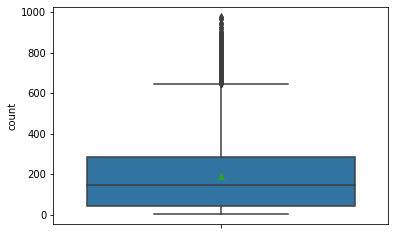

In [207]:
sns.boxplot(y = yulu["count"], showmeans = True)
plt.show()

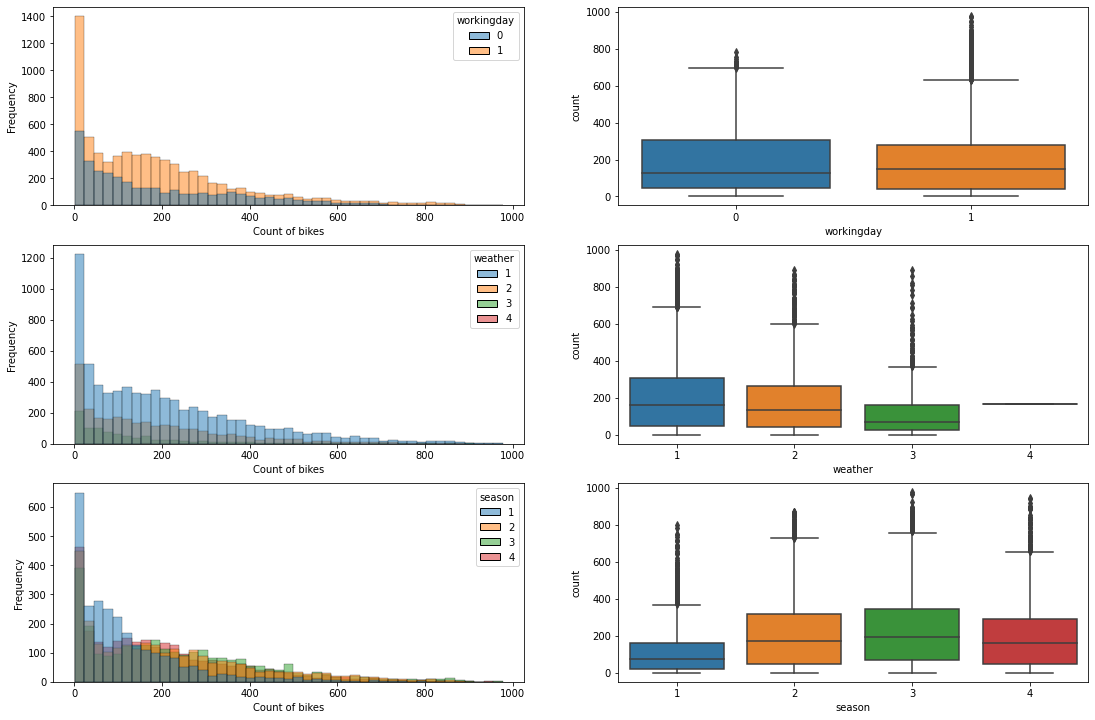

In [248]:
fig, axs = plt.subplots(nrows = 3,  ncols = 2,  figsize=(5, 5))
sns.histplot(data = yulu, x = "count", hue = "workingday", ax = axs[0][0])
sns.boxplot(data = yulu, y = "count", x = "workingday", ax = axs[0][1])
sns.histplot(data = yulu, x = "count", hue = "weather", ax = axs[1][0])
sns.boxplot(data = yulu, y = "count", x = "weather", ax = axs[1][1])
sns.histplot(data = yulu, x = "count", hue = "season", ax = axs[2][0])
sns.boxplot(data = yulu, y = "count", x = "season", ax = axs[2][1])
axs[0][0].set_xlabel("Count of bikes")
axs[0][0].set_ylabel("Frequency")
axs[1][0].set_xlabel("Count of bikes")
axs[1][0].set_ylabel("Frequency")
axs[2][0].set_xlabel("Count of bikes")
axs[2][0].set_ylabel("Frequency")

plt.subplots_adjust(right = 3, top = 2)
plt.show()

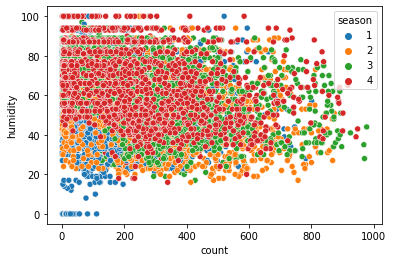

In [230]:
sns.scatterplot(data = yulu, x = "count", y ="humidity", hue = "season")
plt.show()

In [208]:
print(yulu.datetime.max() - yulu.datetime.min())

718 days 23:00:00


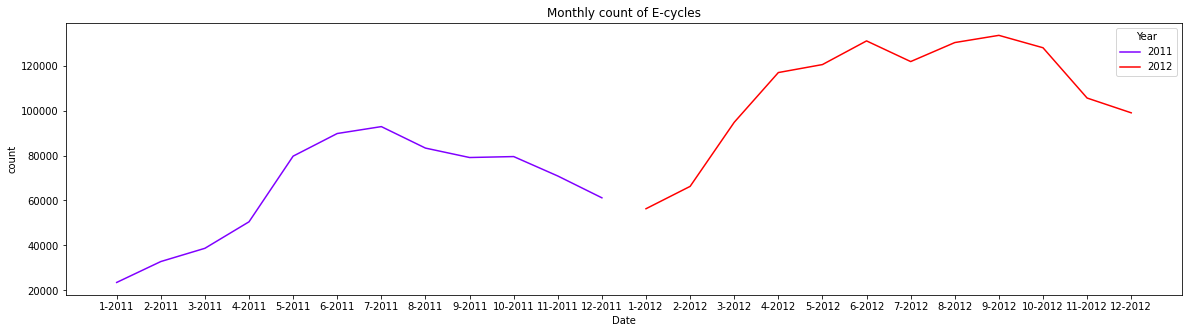

In [209]:
temp_yulu = yulu
temp_yulu["Month"] = yulu.datetime.dt.month
temp_yulu["Year"] = yulu.datetime.dt.year
grouped = temp_yulu.groupby(["Month", "Year"]).agg({"count" : sum}).reset_index()
grouped.sort_values(by = ["Year", "Month"], axis = 0, ascending=True, inplace = True)
grouped["combined"] = grouped["Month"].astype(str) + "-" + grouped["Year"].astype(str)

plt.figure(figsize = (20, 5))
sns.lineplot(data = grouped, x = "combined", y = "count", hue = "Year", palette = "rainbow", ci = None)
plt.xlabel("Date")
plt.title("Monthly count of E-cycles")
plt.show()

<h4> Insights </h4>
<ul>
    <li> Dataset contains 10,886 no-null data points which 12 categories. There are some non-major categories like casual and registered users. Since we are not measuring the impact of the other features on them but rather the overall count.</li>
    <li> Dataset contains <b> no null values </b></li>
    <li> From data.describe(), we can clearly see that "casual", "registered", and "count" columns are not uniformly distributed. Their standard deviation is extremely high and the means are quite far off from the median. This indicates that we are <b>dealing with outlier values</b></li>
    <li> Values are distributed almost evenly among the seasons. </li>
    <li> There are a huge number of non-holiday days as compared to holiday days. This is expected as most employees get 20-25 days of official holidays per calendar year </li>
    <li> There are approximately 30% non-working days, this may include weekends. Which consist of approximately 30% of days of the year </li>
    <li> Mostly the weather is calm, rough weather is extremely rare, coming to about only ~ 0.07% of all days </li>
    <li> There is an extremely low difference in the medians of bicycle usage while comparing working and non-working days. <b>We need to apply some tests to check whether the differences are actually significant towards predicting bicycle usage or not</b></li>
    <li> <b>As the weather turns worse/rough, the bicyle usage comes down</b>. Mild weather (cloudy) doesn't seem to affect ride sharing a lot, but if its raining or snowing significantly then there is visible difference</li>
    <li> Spring season has the lowest bicycle usage by far, even less than the winter season. Summer and fall enjoy good ride-sharing numbers</li>
    <li><b>Bicycle usage skyrockets between April and July, then tanks after October. Overall, Yulu business is doing well in 2011-12 since ride-sharing increased in 2012 as compared to 2011 for all seasons </b></li>
    <li><b> ALL THE HISTOGRAMS PLOTTED WERE HIGHLY SKEWED </b></li>
        
</ul>

<h4> Recommendations </h4>
<ul> 
    <li> <b>Even though we have found multiple outliers using IQR method, we won't drop them</b>. This is because there might be conditions wherein there is a surge of bicycle usage due to real life factors like festivals, car-aggregator strikes, non-availability of public transport etc. <b>We can create a seperate category for these values and try to find if they are correlated with our features or not, since we want to replicate high demand situations for the business </b></li>
    <li> We can see weather- 4 values are extemely less (only 1 obs), <b> hence we will ignore this in further calculations as its not significant </b></li>
    <li> Apply tests to check all our hypothesis</li>
    <li> Yulu's numbers are continously growing so <b>their strategy is working</b>, however there is some seasonality to Yulu's business. <b>They should make sure to have ample bicyles on the road for the Summer and Fall seasons and expect a surge in demand during these months</b> To combat the surge, they need to <b>hire more mechanics, perform maintenance in the off-seasons and raise for even more explosive growth</b></li>
    <li> To increase ridership in winter/spring months, Yulu can start offering steep discounts so that minimum numbers are maintained</li>
</ul>

<h3><u><center> Hypothesis Testing </center></u></h3>
<ol>
    <li> Check whether "Working Day" has effect on number of electric cycles rented</li>
    <li> No. of cycles rented similar or different in different seasons </li>
    <li> No. of cycles rented similar or different in different weather </li>
    <li> Relationship between weather and the season (check between 2 predictor variable)</li>
</ol>

<b><u> Problem : Check whether "Working Day" has effect on number of electric cycles rented </u></b>
<br>Types of variables : Count of cycles (Numerical) v/s Working Day (Categorical - Working and Non-working day)
<br> Test to be used: <b>2 Sample right tailed independent T-Test</b>
<br> Assumptions: T-Test is parametric, hence population should follow <b>normal distribution</b>. All samples should be selected <b>independent</b> of each other

<br> Null Hyp => Mean(count of cycles on working day) = Mean(count of cycles on non-working day)
<br> Alt Hyp => Mean(count of cycles on working day) > Mean(count of cycles on non-working day)

In [296]:
working_day = yulu["count"][yulu["workingday"] == 1]
non_working_day = yulu["count"][yulu["workingday"] == 0]
sample_size = min(working_day.count(), non_working_day.count())

working_day = working_day.sample(sample_size)
non_working_day = non_working_day.sample(sample_size)
print("Number of cycles rented on working days on average: ", working_day.mean())
print("Number of cycles rented on Non-working days on average: ", non_working_day.mean())

Number of cycles rented on working days on average:  194.45509499136443
Number of cycles rented on Non-working days on average:  188.50662061024755


In [297]:
# Checking if both samples belong from normal dist
# Ho (Null hyp) => Normally distributed
# Ha (Alt hyp) => Not normally distributed
alpha = 0.1

w_stat, p_val = shapiro(working_day)
print("W-statistic", w_stat, "P-value", p_val)

if(p_val < alpha):
    print("Reject Null Hyp - Distribution is not normally distributed")
else:
    print("Fail to reject Null Hyp - Distribution is normally distributed")
    
w_stat, p_val = shapiro(non_working_day)
print("W-statistic", w_stat, "P-value", p_val)

if(p_val < 0.05):
    print("Reject Null Hyp - Distribution is not normally distributed")
else:
    print("Fail to reject Null Hyp - Distribution is normally distributed")

W-statistic 0.8734694719314575 P-value 0.0
Reject Null Hyp - Distribution is not normally distributed
W-statistic 0.8852126598358154 P-value 4.203895392974451e-45
Reject Null Hyp - Distribution is not normally distributed


**Since distribution was right-skewed in the histogram, using log-normal and boxcox transform  to try to make dist normal**

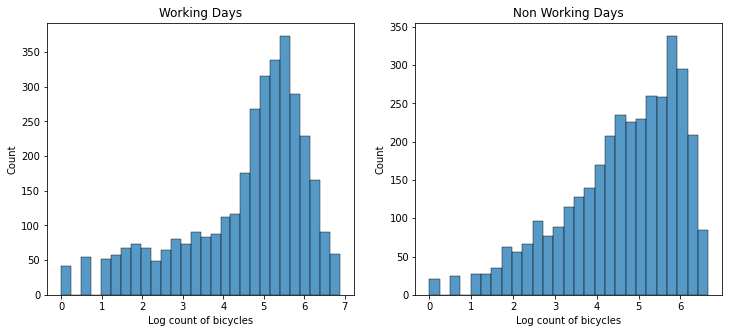

In [298]:
log1 = np.log(working_day)
log2 = np.log(non_working_day)

fig, axs = plt.subplots(nrows = 1,  ncols = 2,  figsize=(5, 5))
sns.histplot(x = log1,  ax = axs[0]).set(title = "Working Days", xlabel = "Log count of bicycles")
sns.histplot(x = log2 , ax = axs[1]).set(title = "Non Working Days", xlabel = "Log count of bicycles")
plt.subplots_adjust(right = 2)
plt.show()

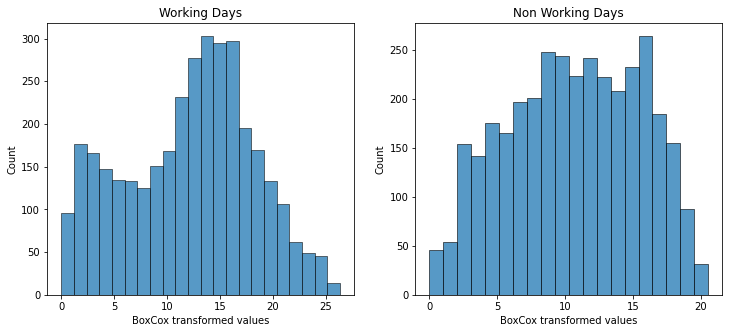

In [299]:
bx1 = boxcox(working_day)
bx2 = boxcox(non_working_day)

fig, axs = plt.subplots(nrows = 1,  ncols = 2,  figsize=(5, 5))
sns.histplot(x = bx1[0],  ax = axs[0]).set(title = "Working Days", xlabel = "BoxCox transformed values")
sns.histplot(x = bx2[0] , ax = axs[1]).set(title = "Non Working Days", xlabel = "BoxCox transformed values")
plt.subplots_adjust(right = 2)
plt.show()

In [300]:
print(shapiro(log1)[1], normaltest(log1)[1])
print(shapiro(log2)[1], normaltest(log2)[1])
print(shapiro(bx1[0])[1], normaltest(bx1[0])[1])
print(shapiro(bx2[0])[1], normaltest(bx2[0])[1])

1.0775985190657843e-42 2.212926367485213e-95
9.749252684808278e-37 4.740913677732802e-73
7.889371880705467e-24 2.1501488786826168e-55
8.138667703973411e-24 2.646450935573252e-132


**As we can see, the distributions are not becoming normal at all, so we will simply continue with the T-Test ASSUMING normality**

In [301]:
print(working_day.var() / non_working_day.var())

1.1257877870694057


**Since, variances are almost equal, we will use equal_var = True in our argument**
<br> **Setting confidence = 90%**

In [304]:
alpha = 0.1 

t_stat, p_val = ttest_ind(working_day, non_working_day, equal_var = True, alternative = "greater")
print("T-statistic", t_stat, "P-value", p_val)

if(p_val < alpha):
    print("Reject Null Hyp - Therefore, mean(working_days) != mean(non_working_days)")
else:
    print("Fail to reject Null Hyp - Therefore, mean(working_days) = mean(non_working_days)")

T-statistic 1.384205880708701 P-value 0.08316994635535979
Reject Null Hyp - Therefore, mean(working_days) != mean(non_working_days)


<b><u> Problem : Check whether "Season" has any effect on number of electric cycles rented </u></b>
<br>Types of variables : Count of cycles (Numerical) v/s Season (Categorical) (4 categories)
<br> Test to be used: <b>One-way ANOVA</b>
<br> Assumptions: ANOVA is parametric, hence population should follow <b>normal distribution</b>. All samples should be selected <b>independent</b> of each other. <b> Variance of data in groups should be similar </b>

<br> Null Hyp => Mean(Cycles sold in Summer) = Mean(Cycles sold in Spring) = Mean(Cycles sold in Fall) = Mean(Cycles sold in Winter)
<br> Alt Hyp => <b> Atleast </b> one mean is different

In [319]:
s1 = yulu["count"][yulu['season'] == 1]
s2 = yulu["count"][yulu['season'] == 2]
s3 = yulu["count"][yulu['season'] == 3]
s4 = yulu["count"][yulu['season'] == 4]

sample_size = min(s1.count(), s2.count(), s3.count(), s4.count())
print("Sample Size = ", sample_size)

s1 = s1.sample(sample_size)
s2 = s2.sample(sample_size)
s3 = s3.sample(sample_size)
s4 = s4.sample(sample_size)

Sample Size =  2686


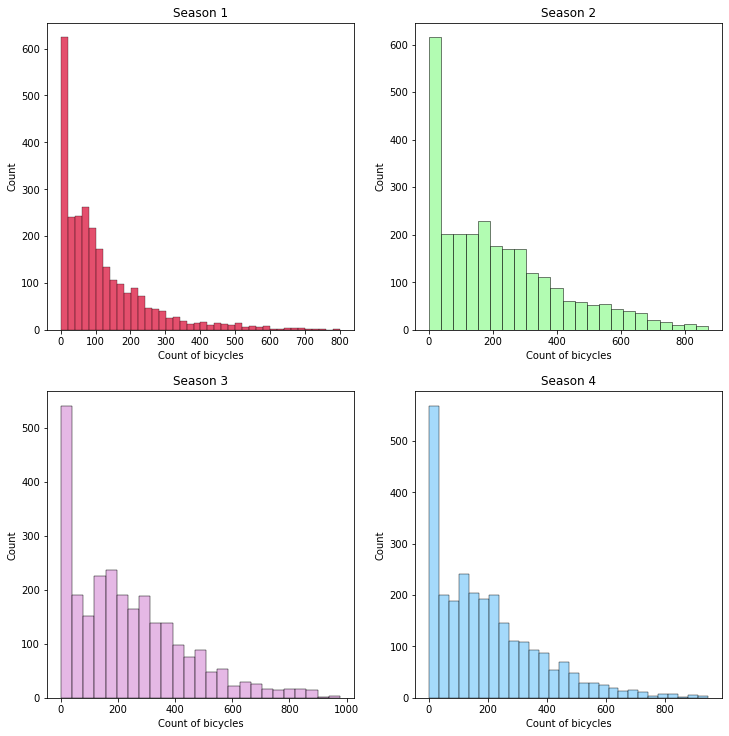

In [320]:
fig, axs = plt.subplots(nrows = 2,  ncols = 2,  figsize=(5, 5))
sns.histplot(x = s1,  ax = axs[0][0], color = "crimson").set(title = "Season 1", xlabel = "Count of bicycles")
sns.histplot(x = s2 , ax = axs[0][1], color = "palegreen").set(title = "Season 2", xlabel = "Count of bicycles")
sns.histplot(x = s3 , ax = axs[1][0], color = "plum").set(title = "Season 3", xlabel = "Count of bicycles")
sns.histplot(x = s4 , ax = axs[1][1], color = "lightskyblue").set(title = "Season 4", xlabel = "Count of bicycles")
plt.subplots_adjust(right = 2, top = 2)
plt.show()

In [327]:
# Levene's test for equal variance
# Null Hyp => Variances are equal
# Alt Hyp => Atleast one variance is not same
# As we can see, the distributions are havily tailed hence we will use centre ‘median’ : Recommended for 
# skewed (non-normal) distributions

alpha = 0.1

l_stat, p_val = levene(s1, s2, s3, s4, center = "mean")
print("L-statistic", l_stat, "P-value", p_val)

if(p_val < alpha):
    print("Reject Null Hyp - All samples dont have similar variance")
else:
    print("Fail to reject Null Hyp - All samples have similar variance")

L-statistic 213.87245875081663 P-value 9.360387601283206e-135
Reject Null Hyp - All samples dont have similar variance


**As we can see, just like our previous data, the population isn't normally distributed at all. Also the variance is quite far from equal. But lets assume normality, equality of variance and perform one-way ANOVA**

In [328]:
alpha = 0.1

f_stat, p_val = f_oneway(s1, s2, s3, s4)
print("F-statistic", f_stat, "P-value", p_val)

if(p_val < alpha):
    print("Reject Null Hyp - Means differ signifcantly")
else:
    print("Fail to reject Null Hyp - Means are similar")

F-statistic 237.61695387759482 P-value 2.767278360411011e-149
Reject Null Hyp - Means differ signifcantly


<b><u> Problem : Check whether "Weather" has any effect on number of electric cycles rented </u></b>
<br>Types of variables : Count of cycles (Numerical) v/s Weather (Categorical) (3 categories - discarding one)
<br> Test to be used: <b>One-way ANOVA</b>. The test will be same as before

<br> Null Hyp => Mean(Cycles sold in Calm weather) = Mean(Cycles sold in Mild weather) = Mean(Cycles sold in rough weather)
<br> Alt Hyp => <b> Atleast </b> one mean is different

In [332]:
w1 = yulu["count"][yulu['weather'] == 1]
w2 = yulu["count"][yulu['weather'] == 2]
w3 = yulu["count"][yulu['weather'] == 3]
sample_size = min(w1.count(), w2.count(), w3.count())
print("Sample Size = ", sample_size)

s1 = w1.sample(sample_size)
s2 = w2.sample(sample_size)
s3 = w3.sample(sample_size)

alpha = 0.1

f_stat, p_val = f_oneway(s1, s2, s3, s4)
print("F-statistic", f_stat, "P-value", p_val)

if(p_val < alpha):
    print("Reject Null Hyp - Means differ signifcantly")
else:
    print("Fail to reject Null Hyp - Means are similar")

Sample Size =  859
F-statistic 51.31988623761632 P-value 1.0973336116530841e-32
Reject Null Hyp - Means differ signifcantly


<b><u> Problem : Check for relationship between weather and the season (check between 2 predictor variable) </u></b>
<br>Types of variables : Season (Categorical) v/s Weather (Categorical) (3 categories - discarding one)
<br> Test to be used: <b>Pearson's Chi-square test for independence</b>
<br> Assumptions: 
    <ol>
    <li> Variables should be discrete/categorical </li>
    <li> All observations should be independent </li>
    <li> Cells in contingency table should be mutually exclusive i.e Rough weather Spring day can't be Calm weather Winter day at the same time </li>
    <li> Min frequency of every cell >= 5 </li>
    </ol>


<br> Null Hyp => Both categories are <b> independent </b> of each other
<br> Alt Hyp => Both categories are <b> dependent </b> on each other

In [348]:
# Creating contigency table, then use chi2 contingency
ct = pd.crosstab(yulu["weather"], yulu["season"])
ct

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


**Assumption of chi2 test is that minimum frequency of a cell must be >= 5. We can see that for weather = 4, we don't have enough values. So we will drop it**

In [349]:
ct = ct.drop(axis=0, index=4) 
ct

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


In [350]:
alpha = 0.05 #Confidence level = 95%

chi_stat, p_val, df, expected_values = chi2_contingency(ct)

print("Expected array", expected_values)
print("Chi Stat:", round(chi_stat, 4))
print("P-Value:", p_val)
if (p_val < alpha):
    print("Null Hyp rejected - Both categories are dependent on each other")
else:
    print("Failed to reject Null- Both categories are independent of each other")

Expected array [[1774.04869086 1805.76352779 1805.76352779 1806.42425356]
 [ 699.06201194  711.55920992  711.55920992  711.81956821]
 [ 211.8892972   215.67726229  215.67726229  215.75617823]]
Chi Stat: 46.1015
P-Value: 2.8260014509929403e-08
Null Hyp rejected - Both categories are dependent on each other


<h3><center><u> Conclusions </u></center></h3>

<ol>
    <li> Mean number of cycles used on working days <b> is significantly different</b> than those sold on non-working days with Level of signifcane = 10%. However, it is very close. <b>If we take confidence to be 95%, then it wouldn't be significantly different. Therefore business needs to decide acceptable Type-1 error</b></li>
    <li><b>Mean number of cycles used per season differ signifcantly</b>, we have rejected null hypothesis from one-way anova</li>
    <li> Similarly, <b>as weather changes, mean number of cycles used differ significantly from each other</b></li>
    <li><b>Weather and the Season are extremely dependent on each other</b> using chi2 test. This also corroborated our findings when we saw that both weather and season affect the bicycle usage</li>
    <li> From our boxplots we saw which all seasons and weather is good for bicycle sharing. Yulu should heavily focus on those seasons and weather coniditions</li>
<ol>